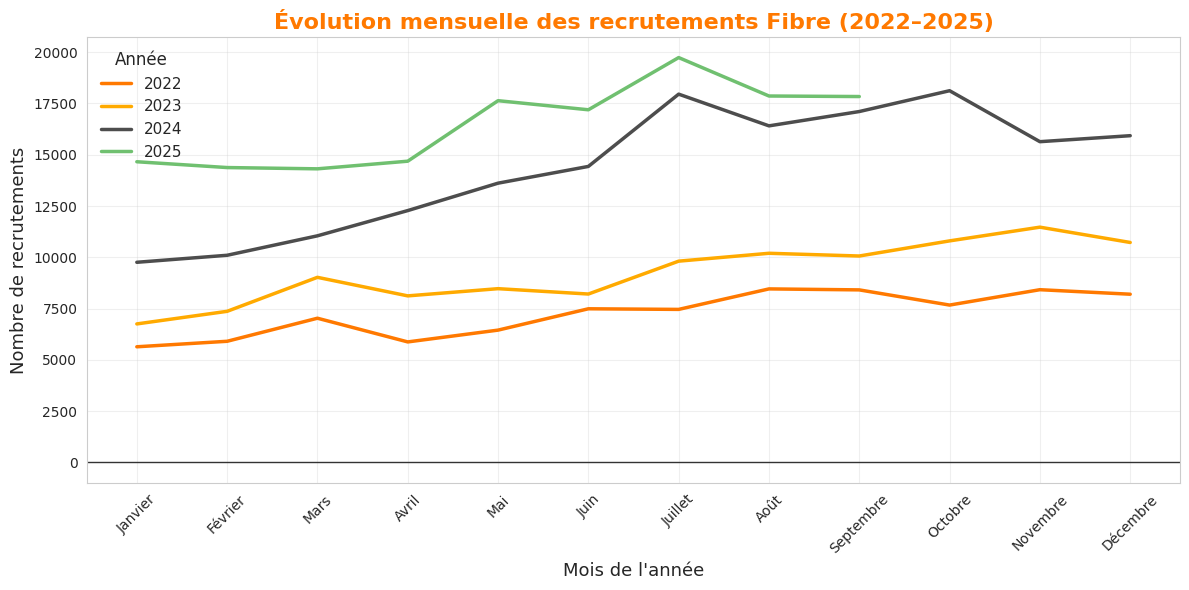

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
df = pd.read_excel("base.xlsx")

# Conversion du champ 'mois' en date
df['mois'] = df['mois'].astype(str)
df['date'] = pd.to_datetime(df['mois'], format='%Y%m')

# Agrégation mensuelle du nombre de recrutements
ventes_mensuelles = df.groupby(['date', 'Année'])['Nbre recrutements'].sum().reset_index()
ventes_mensuelles['mois_num'] = ventes_mensuelles['date'].dt.month

# Tableau Mois × Année
courbe_annuelle = ventes_mensuelles.pivot_table(
    index='mois_num', columns='Année', values='Nbre recrutements', aggfunc='sum'
)

# 🟧 Palette inspirée de la charte Orange Côte d’Ivoire
couleurs_orange = ['#FF7900', '#FFAA00', '#4D4D4D', '#70c070']  # orange vif, orange clair, gris foncé, gris clair
sns.set_style("whitegrid")

# Création du graphique
plt.figure(figsize=(12, 6))

for i, annee in enumerate(courbe_annuelle.columns):
    plt.plot(
        courbe_annuelle.index,
        courbe_annuelle[annee],
        color=couleurs_orange[i % len(couleurs_orange)],
        linewidth=2.5,
        label=str(annee)
    )

# Mise en forme des axes
plt.title("Évolution mensuelle des recrutements Fibre (2022–2025)", fontsize=16, fontweight='bold', color='#FF7900')
plt.xlabel("Mois de l'année", fontsize=13)
plt.ylabel("Nombre de recrutements", fontsize=13)
plt.xticks(
    ticks=range(1, 13),
    labels=['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin',
            'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'],
    rotation=45
)

# Ajustements esthétiques
plt.legend(title="Année", fontsize=11, title_fontsize=12, loc='upper left', frameon=False)
plt.grid(alpha=0.3)
plt.tight_layout()

# Ajout d’une ligne horizontale fine pour la lisibilité
plt.axhline(y=0, color='#333333', linewidth=1)

plt.show()


In [2]:
import pandas as pd

import pandas as pd

# Chargement des données
df = pd.read_excel("base.xlsx")

# Création du tableau synthétique
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Colonne', 'Nombre de valeurs manquantes']
missing_values['% de valeurs manquantes'] = (missing_values['Nombre de valeurs manquantes'] / len(df)) * 100

# Trier par pourcentage décroissant
missing_values = missing_values.sort_values('% de valeurs manquantes', ascending=False)

print(missing_values)



              Colonne  Nombre de valeurs manquantes  % de valeurs manquantes
8              profil                          9050                14.331639
9               debit                             2                 0.003167
2      geolocalisaton                             0                 0.000000
1                mois                             0                 0.000000
0               Année                             0                 0.000000
4               canal                             0                 0.000000
3        Localisation                             0                 0.000000
6           franchise                             0                 0.000000
5          partenaire                             0                 0.000000
7           categorie                             0                 0.000000
10     plan tarifaire                             0                 0.000000
11          Recurrent                             0                 0.000000

In [3]:
import pandas as pd
from tabulate import tabulate  # pour un joli rendu

# Chargement des données
df = pd.read_excel("base.xlsx")

# Calcul des valeurs manquantes
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Colonne', 'Nombre de valeurs manquantes']
missing_values['% de valeurs manquantes'] = (missing_values['Nombre de valeurs manquantes'] / len(df)) * 100

# Trier par pourcentage décroissant
missing_values = missing_values.sort_values('% de valeurs manquantes', ascending=False)

# Tableau esthétique pour mémoire
print(tabulate(missing_values, headers='keys', tablefmt='fancy_grid', floatfmt=".2f"))


╒════╤═══════════════════╤════════════════════════════════╤═══════════════════════════╕
│    │ Colonne           │   Nombre de valeurs manquantes │   % de valeurs manquantes │
╞════╪═══════════════════╪════════════════════════════════╪═══════════════════════════╡
│  8 │ profil            │                           9050 │                     14.33 │
├────┼───────────────────┼────────────────────────────────┼───────────────────────────┤
│  9 │ debit             │                              2 │                      0.00 │
├────┼───────────────────┼────────────────────────────────┼───────────────────────────┤
│  2 │ geolocalisaton    │                              0 │                      0.00 │
├────┼───────────────────┼────────────────────────────────┼───────────────────────────┤
│  1 │ mois              │                              0 │                      0.00 │
├────┼───────────────────┼────────────────────────────────┼───────────────────────────┤
│  0 │ Année             │      

Tableau des valeurs manquantes :


,Colonne,Nb_Manquantes,%_Manquantes
8,profil,9050,14.331639
9,debit,2,0.003167
2,geolocalisaton,0,0.000000
1,mois,0,0.000000
0,Année,0,0.000000
4,canal,0,0.000000
3,Localisation,0,0.000000
6,franchise,0,0.000000
5,partenaire,0,0.000000
7,categorie,0,0.000000


<Figure size 1500x600 with 0 Axes>

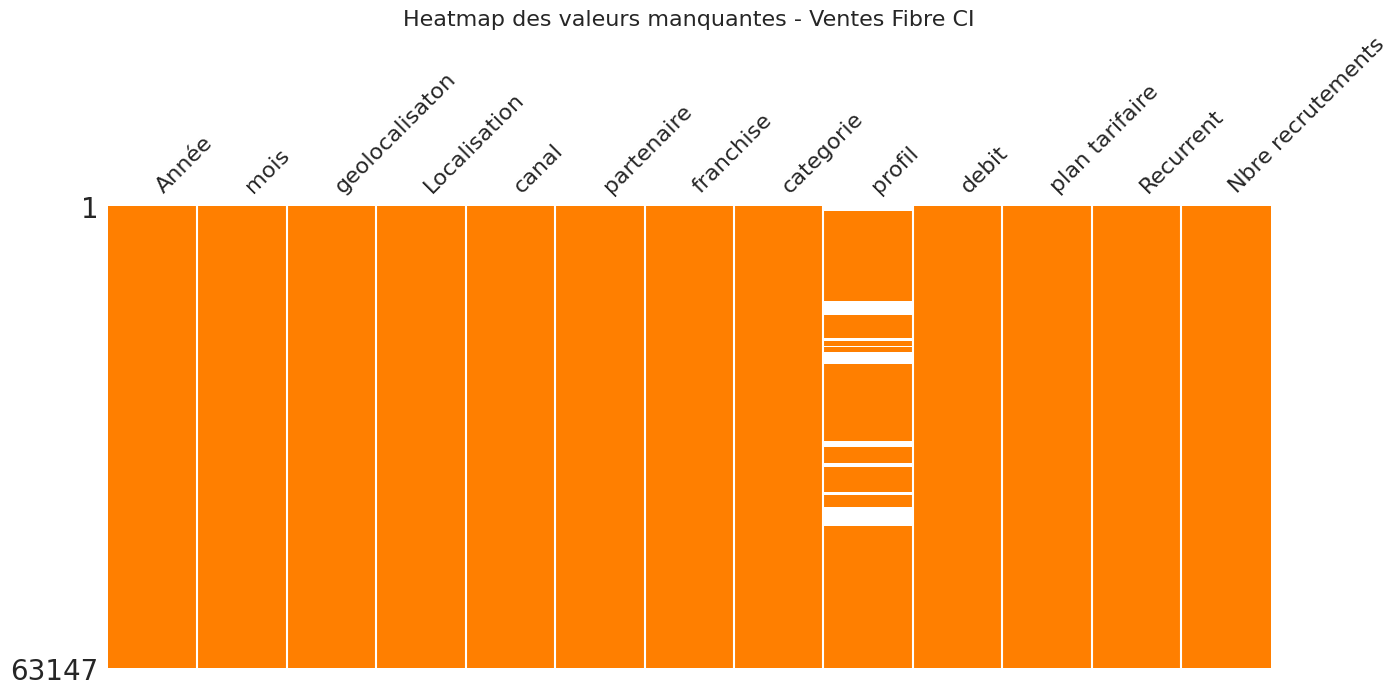

In [4]:
# Installer les librairies si nécessaire
!pip install seaborn missingno -q

# Importer les librairies
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# Charger le fichier CSV
df = pd.read_excel("base.xlsx")  # <-- remplacer par ton fichier

# ---- Tableau des valeurs manquantes ----
missing_table = df.isnull().sum().reset_index()
missing_table.columns = ['Colonne', 'Nb_Manquantes']
missing_table['%_Manquantes'] = (missing_table['Nb_Manquantes'] / len(df)) * 100
missing_table = missing_table.sort_values('%_Manquantes', ascending=False)
print("Tableau des valeurs manquantes :")
display(missing_table)

# ---- Heatmap style Missingno mais avec couleurs personnalisées ----
plt.figure(figsize=(15,6))
msno.matrix(
    df,
    figsize=(15,6),
    labels=True,
    color=(1, 0.5, 0),  # orange pour les valeurs manquantes
    sparkline=False     # enlève la mini courbe en bas
)
plt.title("Heatmap des valeurs manquantes - Ventes Fibre CI", fontsize=16)
plt.show()



In [5]:
# Remplacer les valeurs manquantes
df['profil'] = df['profil'].fillna('Non renseigné')
df['debit'] = df['debit'].fillna(df['debit'].mode()[0])

# Créer un tableau récapitulatif des valeurs manquantes après traitement
missing_table_after = df.isnull().sum().reset_index()
missing_table_after.columns = ['Colonne', 'Nb_Manquantes']
missing_table_after['%_Manquantes'] = (missing_table_after['Nb_Manquantes'] / len(df)) * 100

# Trier par % manquantes (facultatif)
missing_table_after = missing_table_after.sort_values('%_Manquantes', ascending=False)

# Afficher le tableau de manière propre pour copier-coller dans Word
import tabulate
from IPython.display import display

# Affichage joli format
display(missing_table_after)

# Option : afficher en format texte clair (copiable)
print(tabulate.tabulate(missing_table_after, headers='keys', tablefmt='grid', showindex=False))




,Colonne,Nb_Manquantes,%_Manquantes
0,Année,0,0.0
1,mois,0,0.0
2,geolocalisaton,0,0.0
3,Localisation,0,0.0
4,canal,0,0.0
5,partenaire,0,0.0
6,franchise,0,0.0
7,categorie,0,0.0
8,profil,0,0.0
9,debit,0,0.0


+-------------------+-----------------+----------------+
| Colonne           |   Nb_Manquantes |   %_Manquantes |
+===================+=================+================+
| Année             |               0 |              0 |
+-------------------+-----------------+----------------+
| mois              |               0 |              0 |
+-------------------+-----------------+----------------+
| geolocalisaton    |               0 |              0 |
+-------------------+-----------------+----------------+
| Localisation      |               0 |              0 |
+-------------------+-----------------+----------------+
| canal             |               0 |              0 |
+-------------------+-----------------+----------------+
| partenaire        |               0 |              0 |
+-------------------+-----------------+----------------+
| franchise         |               0 |              0 |
+-------------------+-----------------+----------------+
| categorie         |          

Statistiques descriptives :
       Nbre recrutements      Recurrent
count       63147.000000   63147.000000
mean            8.213771   24638.985225
std            44.771260   14925.531714
min             1.000000   15000.000000
25%             1.000000   15000.000000
50%             2.000000   20000.000000
75%             5.000000   25000.000000
max          3366.000000  100000.000000


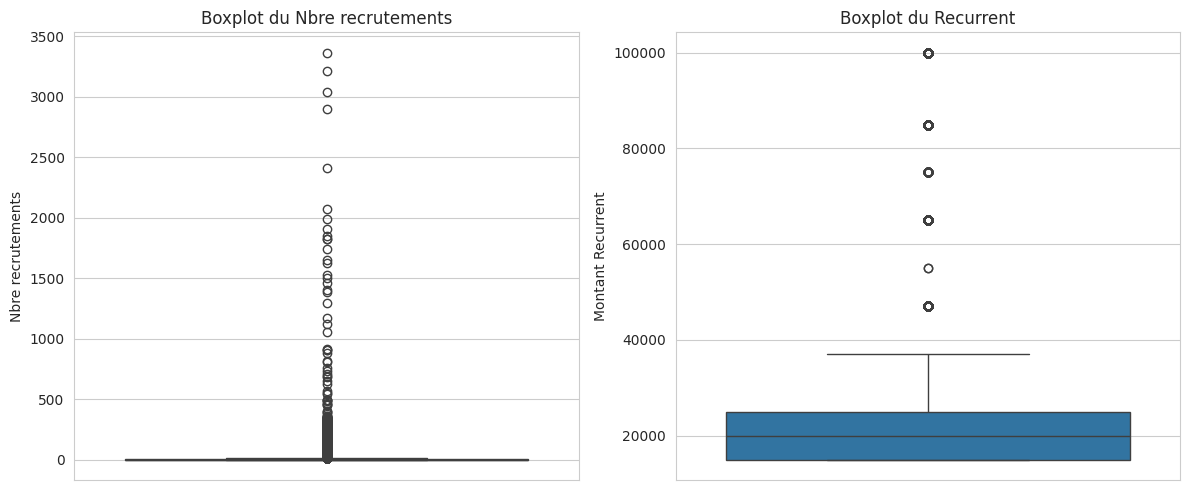

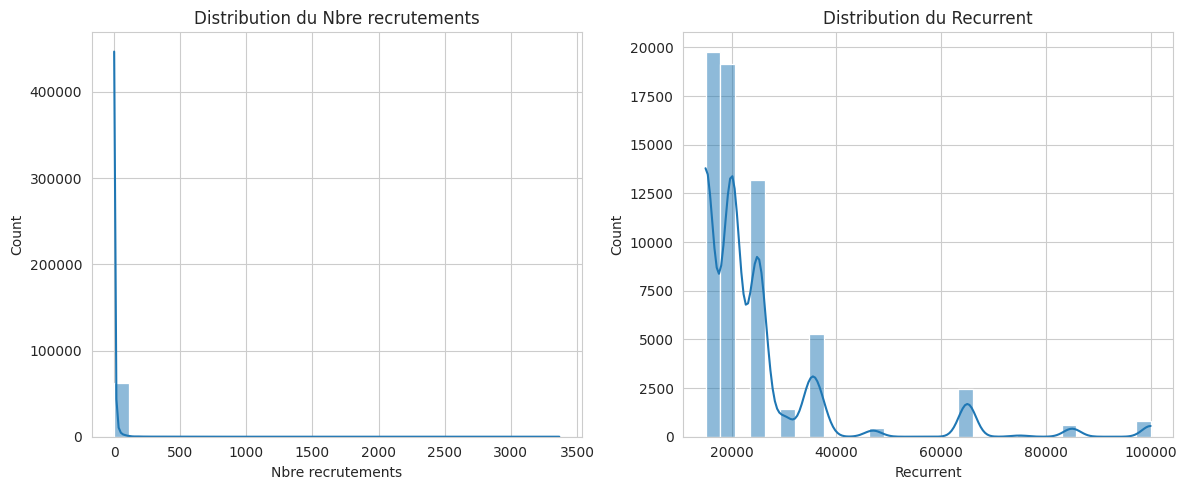

Nombre de valeurs potentiellement aberrantes pour Nbre recrutements : 8221


,Année,mois,geolocalisaton,Localisation,canal,partenaire,franchise,categorie,profil,debit,plan tarifaire,Recurrent,Nbre recrutements
0,2025,202503,NON LOCALISE,NON LOCALISE,D2D,LIFE EVENT,NON APPLICABLE,B2B,Non renseigné,100M,Fibre UP Pro Esse 100M,20000,13
5,2025,202503,ABIDJAN,PORT-BOUET,D2D,LIFE EVENT,NON APPLICABLE,B2C,Non renseigné,100M,Fibre UP Essentiel 100M,20000,36
7,2025,202503,ABIDJAN,SONGON,D2D,LIFE EVENT,NON APPLICABLE,B2C,Non renseigné,100M,Fibre UP Essentiel 100M,20000,15
10,2025,202503,ABIDJAN,YOPOUGON,D2D,LIFE EVENT,NON APPLICABLE,B2C,Non renseigné,100M,Fibre UP Essentiel 100M,20000,34
14,2025,202503,ABIDJAN,ABOBO,D2D,NEW LINE,NON APPLICABLE,B2C,Non renseigné,100M,Fibre UP Essentiel 100M,20000,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63096,2022,202201,ABIDJAN,NON LOCALISE,DXC,NON IDENTIFIE,NON APPLICABLE,B2C,POSTPAID,5M,Ofibre Standard,20000,13
63097,2022,202202,ABIDJAN,NON LOCALISE,DXC,NON IDENTIFIE,NON APPLICABLE,B2C,POSTPAID,5M,Ofibre Standard,20000,16
63117,2022,202202,ABIDJAN,NON LOCALISE,D2D,SPI,NON APPLICABLE,B2C,POSTPAID,5M,Ofibre Standard,20000,19
63124,2022,202201,ABIDJAN,NON LOCALISE,DRDI,NON IDENTIFIE,NON IDENTIFIE,B2C,POSTPAID,5M,Ofibre Standard,20000,77


Nombre de valeurs potentiellement aberrantes pour Recurrent : 4375


,Année,mois,geolocalisaton,Localisation,canal,partenaire,franchise,categorie,profil,debit,plan tarifaire,Recurrent,Nbre recrutements
13082,2023,202301,ABIDJAN,NON LOCALISE,D2D,NEW LINE,NON APPLICABLE,B2C,Non renseigné,100M,OBox Plus,47000,1
13140,2023,202305,ABIDJAN,GRAND-BASSAM,D2D,NON IDENTIFIE,NON APPLICABLE,B2B,Non renseigné,100M,Fibre Pro Plus 100M,47000,1
13161,2023,202301,ABIDJAN,NON LOCALISE,D2D,NON IDENTIFIE,NON APPLICABLE,B2B,Non renseigné,100M,Fibre Pro Plus 100M,47000,3
13163,2023,202301,ABIDJAN,NON LOCALISE,D2D,NON IDENTIFIE,NON APPLICABLE,B2C,Non renseigné,100M,OBox Plus,47000,9
13165,2023,202302,ABIDJAN,NON LOCALISE,D2D,NON IDENTIFIE,NON APPLICABLE,B2B,Non renseigné,100M,Fibre Pro Plus 100M,47000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63142,2023,202306,ABIDJAN,COCODY,DXC,SMARTSTORE,NON APPLICABLE,B2C,PREPAID,600M,Ofibre Must 600M,85000,1
63143,2023,202306,ABIDJAN,COCODY,TELEVENTE DAV,TELEVENTE DAV,NON APPLICABLE,B2B,PREPAID,600M,Fibre Pro Must 600M,85000,1
63144,2023,202306,ABIDJAN,COCODY,DRDI,NON IDENTIFIE,NON IDENTIFIE,B2C,PREPAID,600M,Ofibre Must 600M,85000,1
63145,2022,202211,ABIDJAN,NON LOCALISE,D2D,ISS,NON APPLICABLE,B2B,POSTPAID,50M,OBox Must Corp,85000,1


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que df est ton DataFrame déjà nettoyé

# --- 1. Statistiques descriptives ---
print("Statistiques descriptives :")
print(df[['Nbre recrutements', 'Recurrent']].describe())

# --- 2. Boxplots pour visualiser les valeurs extrêmes ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(y=df['Nbre recrutements'])
plt.title('Boxplot du Nbre recrutements')
plt.ylabel('Nbre recrutements')

plt.subplot(1,2,2)
sns.boxplot(y=df['Recurrent'])
plt.title('Boxplot du Recurrent')
plt.ylabel('Montant Recurrent')

plt.tight_layout()
plt.show()

# --- 3. Histogrammes pour observer la distribution ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Nbre recrutements'], bins=30, kde=True)
plt.title('Distribution du Nbre recrutements')

plt.subplot(1,2,2)
sns.histplot(df['Recurrent'], bins=30, kde=True)
plt.title('Distribution du Recurrent')

plt.tight_layout()
plt.show()

# --- 4. Identifier les valeurs potentiellement aberrantes (hors IQR) ---
Q1 = df['Nbre recrutements'].quantile(0.25)
Q3 = df['Nbre recrutements'].quantile(0.75)
IQR = Q3 - Q1

aberrants_recrutements = df[(df['Nbre recrutements'] < (Q1 - 1.5*IQR)) |
                      (df['Nbre recrutements'] > (Q3 + 1.5*IQR))]

print(f"Nombre de valeurs potentiellement aberrantes pour Nbre recrutements : {len(aberrants_recrutements)}")
display(aberrants_recrutements)

# Même principe pour Récurrent
Q1_r = df['Recurrent'].quantile(0.25)
Q3_r = df['Recurrent'].quantile(0.75)
IQR_r = Q3_r - Q1_r

aberrants_recurrent = df[(df['Recurrent'] < (Q1_r - 1.5*IQR_r)) |
                         (df['Recurrent'] > (Q3_r + 1.5*IQR_r))]

print(f"Nombre de valeurs potentiellement aberrantes pour Recurrent : {len(aberrants_recurrent)}")
display(aberrants_recurrent)


In [7]:
# Nettoyage de la colonne 'debit'
df['debit'] = df['debit'].astype(str).str.strip()  # Supprime les espaces avant/après
df['debit'] = df['debit'].replace(r'(?i)\b1gb\b', '1GB', regex=True)


In [8]:
df['debit'] = df['debit'].replace(['', 'nan', 'None'], '50M')
df['debit'] = df['debit'].fillna('50M')
df['debit'].value_counts(dropna=False)

,count
debit,
50M,21891
100M,17983
200M,12286
300M,4038
20M,2864
500M,2003
10M,1102
1GB,799
5M,121


Statistiques descriptives des variables quantitatives :
                     count          mean           std      min      25%  \
Nbre recrutements  63147.0      8.213771     44.771260      1.0      1.0   
Recurrent          63147.0  24638.985225  14925.531714  15000.0  15000.0   

                       50%      75%       max  
Nbre recrutements      2.0      5.0    3366.0  
Recurrent          20000.0  25000.0  100000.0  


/tmp/ipython-input-3786069993.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sum, x=var, y='Nbre recrutements', palette=['#FF4500', '#000000'])
/tmp/ipython-input-3786069993.py:40: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_sum, x=var, y='Nbre recrutements', palette=['#FF4500', '#000000'])


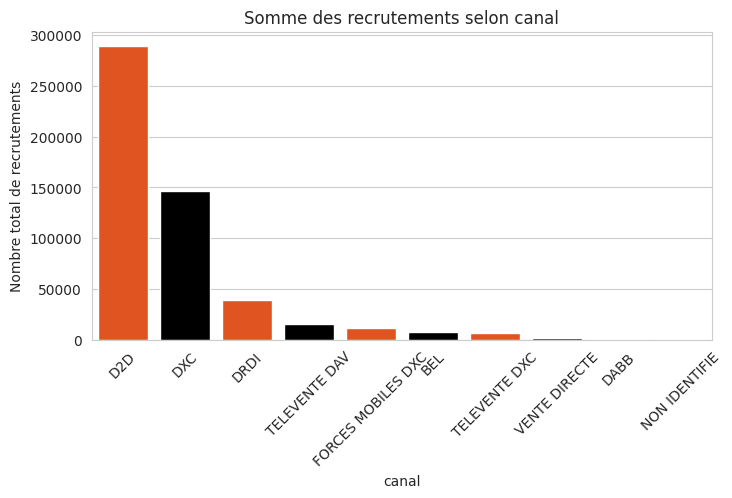

/tmp/ipython-input-3786069993.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sum, x=var, y='Nbre recrutements', palette=['#FF4500', '#000000'])
/tmp/ipython-input-3786069993.py:40: UserWarning: 
The palette list has fewer values (2) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_sum, x=var, y='Nbre recrutements', palette=['#FF4500', '#000000'])


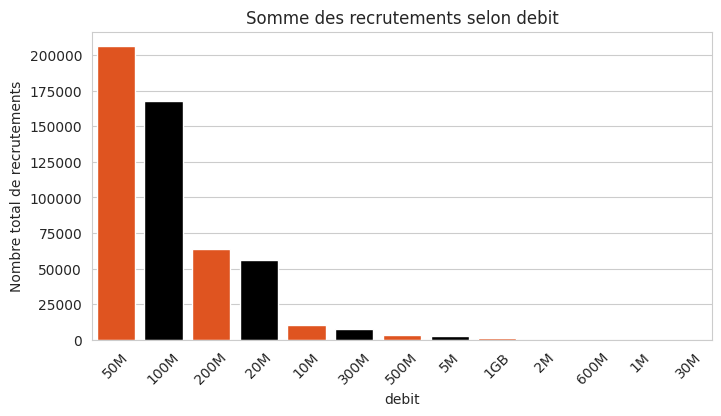

/tmp/ipython-input-3786069993.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sum, x=var, y='Nbre recrutements', palette=['#FF4500', '#000000'])


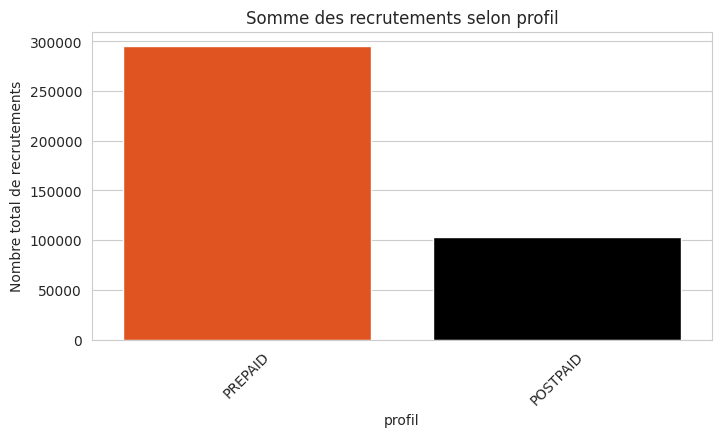

/tmp/ipython-input-3786069993.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sum, x=var, y='Nbre recrutements', palette=['#FF4500', '#000000'])


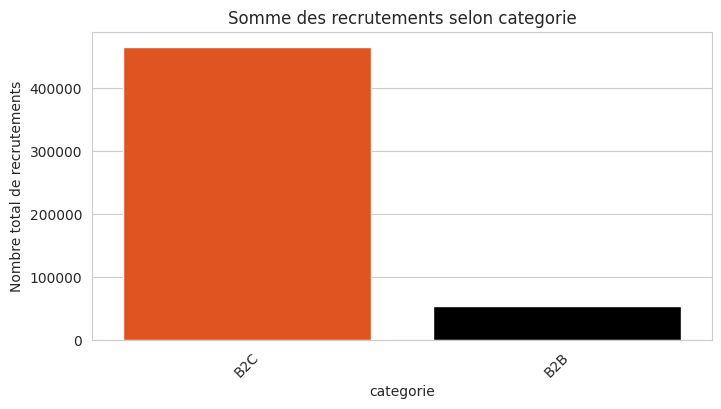

/tmp/ipython-input-3786069993.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sum, x=var, y='Nbre recrutements', palette=['#FF4500', '#000000'])
/tmp/ipython-input-3786069993.py:40: UserWarning: 
The palette list has fewer values (2) than needed (71) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_sum, x=var, y='Nbre recrutements', palette=['#FF4500', '#000000'])


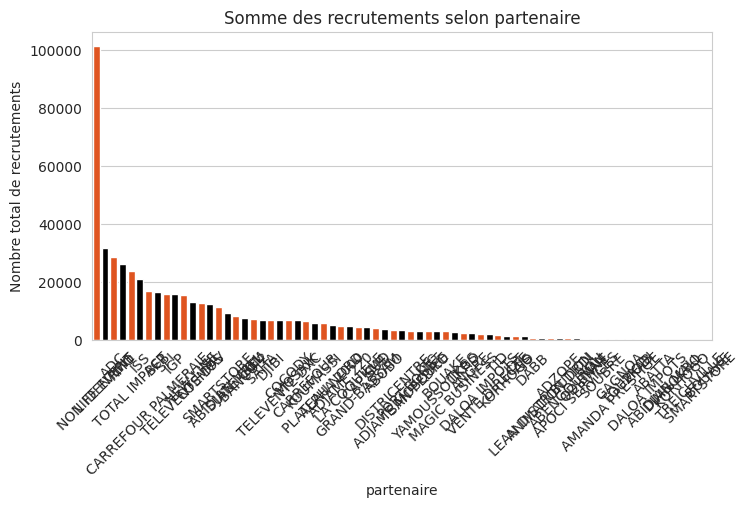

In [9]:
# Import des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le jeu de données
df = pd.read_excel("base.xlsx")

df_clean = df.copy()

df_clean['debit'] = df_clean['debit'].astype(str).str.strip()
df_clean['debit'] = df_clean['debit'].replace(r'(?i)\b1gb\b', '1GB', regex=True)
df_clean['debit'] = df_clean['debit'].replace(['', 'nan', 'None'], '50M')
df_clean['debit'] = df_clean['debit'].fillna('50M')



# === 1. Statistiques descriptives pour les variables quantitatives ===
quant_vars = ['Nbre recrutements', 'Recurrent']

stats_desc = df_clean[quant_vars].describe().T  # Transposé pour une meilleure lisibilité
print("Statistiques descriptives des variables quantitatives :")
print(stats_desc)

import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables qualitatives à représenter
qual_vars = ['canal', 'debit', 'profil', 'categorie', 'partenaire']

for var in qual_vars:
    # Agrégation : somme des Nbre recrutements par modalité
    df_sum = df_clean.groupby(var)['Nbre recrutements'].sum().reset_index()

    # Tri décroissant pour une meilleure lisibilité
    df_sum = df_sum.sort_values(by='Nbre recrutements', ascending=False)

    # Diagramme en barres
    plt.figure(figsize=(8,4))
    sns.barplot(data=df_sum, x=var, y='Nbre recrutements', palette=['#FF4500', '#000000'])
    plt.title(f"Somme des recrutements selon {var}")
    plt.xticks(rotation=45)
    plt.ylabel("Nombre total de recrutements")
    plt.show()



In [10]:
df_clean.groupby('profil')['Nbre recrutements'].sum()



,Nbre recrutements
profil,
POSTPAID,103392
PREPAID,295003


In [11]:
# Remplacer les valeurs nulles de la colonne 'profit' par 'Non renseigné'
df_clean['profil'] = df_clean['profil'].fillna("Non renseigné")

# Vérification
df_clean['profil'].value_counts(dropna=False)


,count
profil,
PREPAID,39705
POSTPAID,14392
Non renseigné,9050


In [12]:
import pandas as pd

# S'assurer que 'mois' a toujours 2 chiffres
df_clean['mois'] = df_clean['mois'].astype(str).str[-2:]  # garde les 2 derniers chiffres si besoin

# Créer la colonne date
df_clean['date'] = pd.to_datetime(df_clean['Année'].astype(str) + df_clean['mois'], format='%Y%m')

# Diviser les données
train_df = df_clean[df_clean['date'] < '2025-01-01']
test_df = df_clean[df_clean['date'] >= '2025-01-01']

# Vérification
print(f"Nombre de lignes apprentissage : {len(train_df)}")
print(f"Nombre de lignes test : {len(test_df)}")

Nombre de lignes apprentissage : 41283
Nombre de lignes test : 21864


In [13]:
# Agrégation mensuelle en sommant les recrutements
ts = df_clean.groupby(pd.Grouper(key='date', freq='M'))['Nbre recrutements'].sum()

# Visualisation rapide
print(ts.head())


date
2022-01-31    5639
2022-02-28    5907
2022-03-31    7031
2022-04-30    5876
2022-05-31    6451
Freq: ME, Name: Nbre recrutements, dtype: int64


/tmp/ipython-input-2337047159.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df_clean.groupby(pd.Grouper(key='date', freq='M'))['Nbre recrutements'].sum()


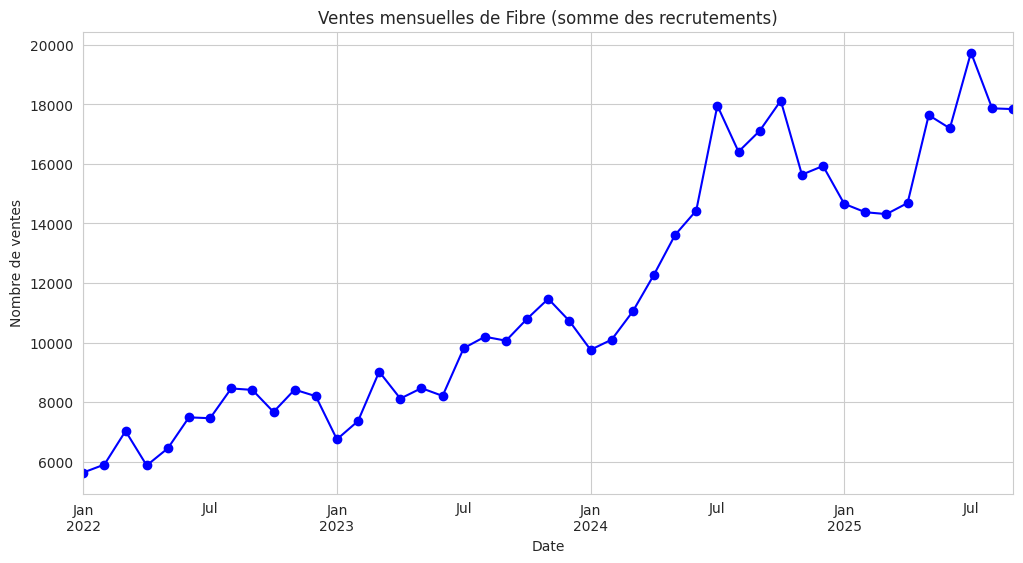

In [14]:
import matplotlib.pyplot as plt

ts.plot(figsize=(12,6), marker='o', color='blue')
plt.title("Ventes mensuelles de Fibre (somme des recrutements)")
plt.xlabel("Date")
plt.ylabel("Nombre de ventes")
plt.grid(True)
plt.show()

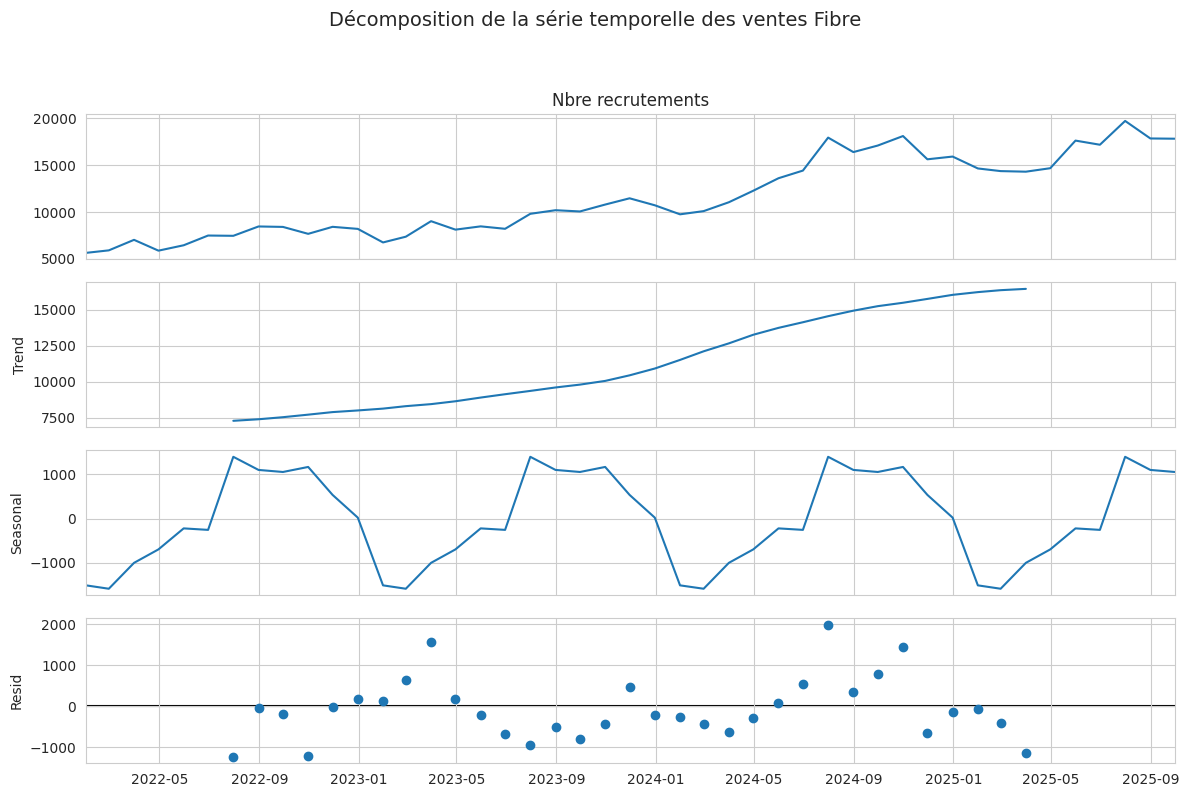

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Décomposition de la série (modèle additif)
result = seasonal_decompose(ts, model='additive')

# Visualisation
plt.rcParams.update({'figure.figsize': (12,8)})
fig = result.plot()
plt.suptitle("Décomposition de la série temporelle des ventes Fibre", fontsize=14, y=1.02) # Ajuster y pour positionner le titre
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajuster rect pour laisser de la place au titre
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

# Test de stationnarité
result = adfuller(ts)

print("Statistique ADF :", result[0])
print("p-value :", result[1])
print("Valeurs critiques :", result[4])


Statistique ADF : -0.2829141693992936
p-value : 0.9278895804528153
Valeurs critiques : {'1%': np.float64(-3.6155091011809297), '5%': np.float64(-2.941262357486514), '10%': np.float64(-2.6091995013850418)}


In [17]:
#import pandas as pd
#from tabulate import tabulate

# result contains (ADF Statistic, p-value, No. of Lags Used, Number of Observations, Critical Values, Information Criteria)
#adf_statistic = result[0]
#p_value = result[1]
#critical_values = result[4]

# Créer un dictionnaire pour le tableau
#data = {
 #   'Metric': ['ADF Statistic', 'p-value', 'Critical Value (1%)', 'Critical Value (5%)', 'Critical Value (10%)'],
  #  'Value': [adf_statistic, p_value, critical_values['1%'], critical_values['5%'], critical_values['10%']]
#}

# Créer un DataFrame
#adf_table = pd.DataFrame(data)

# Afficher le tableau épuré
#print(tabulate(adf_table, headers='keys', tablefmt='grid', showindex=False))

In [18]:
ts_diff = ts.diff().dropna()

# Retest de stationnarité
result_diff = adfuller(ts_diff)
print("p-value après différenciation :", result_diff[1])


p-value après différenciation : 5.7934120149863906e-05


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      Nbre recrutements   No. Observations:                   45
Model:                ARIMA(1, 1, 12)   Log Likelihood                -368.511
Date:                Mon, 17 Nov 2025   AIC                            765.022
Time:                        12:35:17   BIC                            790.000
Sample:                    01-31-2022   HQIC                           774.285
                         - 09-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5048      0.992     -0.509      0.611      -2.449       1.439
ma.L1          0.3834      1.108      0.346      0.729      -1.788       2.554
ma.L2          0.2727      0.420      0.649      0.5

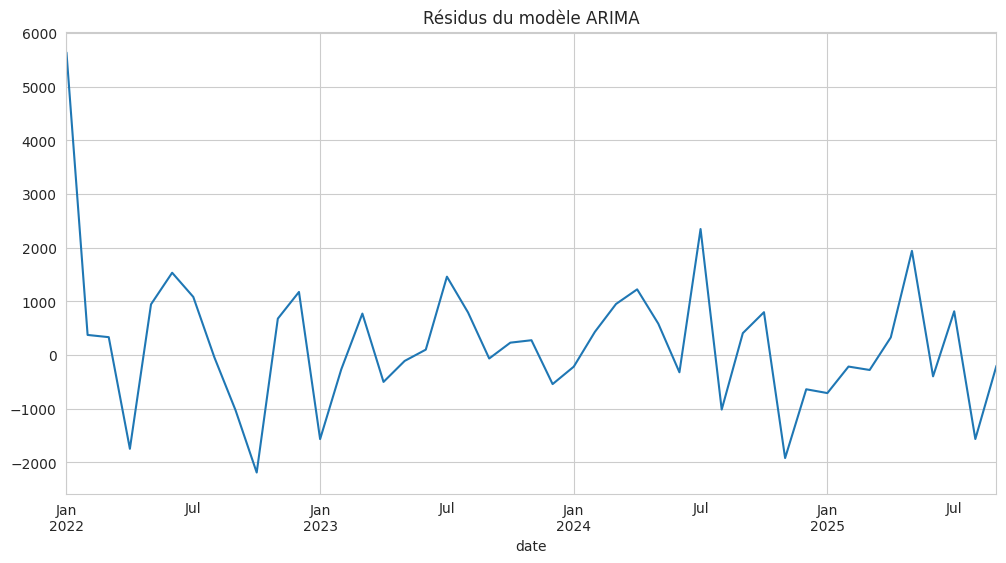

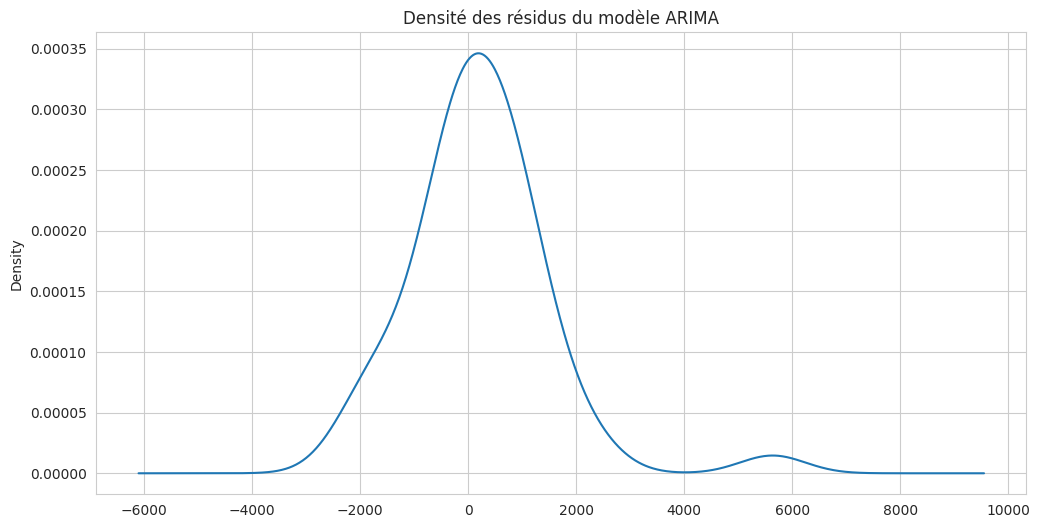


Statistiques descriptives des résidus :
count      45.000000
mean      217.484871
std      1297.022313
min     -2186.864856
25%      -394.861109
50%       232.788750
75%       800.663363
max      5639.000000
dtype: float64


In [19]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Définir l'ordre (p, d, q) - Exemple avec ARIMA(1,1,1)
order = (1, 1, 12)

# Adapter le modèle ARIMA
# Nous utilisons la série différenciée si nécessaire, mais le modèle ARIMA prend l'ordre d en paramètre
# Donc, on utilise la série originale 'ts' et on spécifie d=1 dans l'ordre.
model = ARIMA(ts, order=order)
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit.summary())

# Visualiser les résidus
residuals = model_fit.resid
residuals.plot(figsize=(12, 6))
plt.title("Résidus du modèle ARIMA")
plt.show()

# Tracer la densité des résidus
residuals.plot(kind='kde', figsize=(12, 6))
plt.title("Densité des résidus du modèle ARIMA")
plt.show()

# Statistiques descriptives des résidus
print("\nStatistiques descriptives des résidus :")
print(residuals.describe())

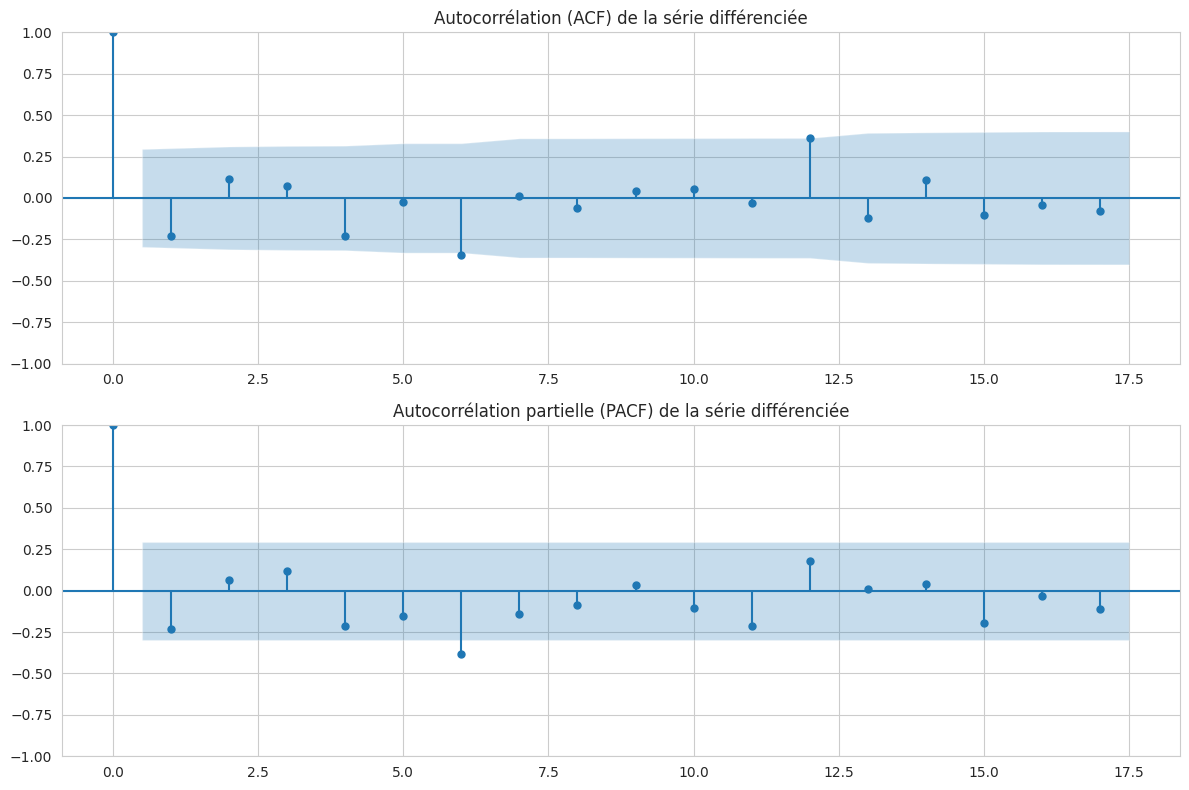

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Tracer les graphiques ACF et PACF de la série différenciée
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(ts_diff, ax=axes[0])
axes[0].set_title("Autocorrélation (ACF) de la série différenciée")

plot_pacf(ts_diff, ax=axes[1])
axes[1].set_title("Autocorrélation partielle (PACF) de la série différenciée")

plt.tight_layout()
plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Définir l'ordre (p, d, q) - ARIMA(1,1,0)
order_110 = (1, 1, 0)

# Adapter le modèle ARIMA(1,1,0)
model_110 = ARIMA(ts, order=order_110)
model_fit_110 = model_110.fit()

# Afficher le résumé du modèle
print("Résumé du modèle ARIMA(1,1,0) :")
print(model_fit_110.summary())

# Visualiser les résidus (facultatif, mais utile pour la comparaison)
# residuals_110 = model_fit_110.resid
# residuals_110.plot(figsize=(12, 6))
# plt.title("Résidus du modèle ARIMA(1,1,0)")
# plt.show()

# Tracer la densité des résidus (facultatif)
# residuals_110.plot(kind='kde', figsize=(12, 6))
# plt.title("Densité des résidus du modèle ARIMA(1,1,0)")
# plt.show()

# Statistiques descriptives des résidus (facultatif)
# print("\nStatistiques descriptives des résidus ARIMA(1,1,0) :")
# print(residuals_110.describe())

Résumé du modèle ARIMA(1,1,0) :
                               SARIMAX Results                                
Dep. Variable:      Nbre recrutements   No. Observations:                   45
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -374.841
Date:                Mon, 17 Nov 2025   AIC                            753.682
Time:                        12:35:29   BIC                            757.250
Sample:                    01-31-2022   HQIC                           755.005
                         - 09-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1287      0.179     -0.719      0.472      -0.480       0.222
sigma2      1.464e+06   2.62e+05      5.587      0.000     9.5e+05    1.98e+06
Ljung-Box (L1) (Q): 

In [22]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Définir l'ordre (p, d, q) - ARIMA(0,1,1)
order_011 = (0, 1, 1)

# Adapter le modèle ARIMA(0,1,1)
model_011 = ARIMA(ts, order=order_011)
model_fit_011 = model_011.fit()

# Afficher le résumé du modèle
print("Résumé du modèle ARIMA(0,1,1) :")
print(model_fit_011.summary())

# Visualiser les résidus (facultatif, mais utile pour la comparaison)
# residuals_011 = model_fit_011.resid
# residuals_011.plot(figsize=(12, 6))
# plt.title("Résidus du modèle ARIMA(0,1,1)")
# plt.show()

# Tracer la densité des résidus (facultatif)
# residuals_011.plot(kind='kde', figsize=(12, 6))
# plt.title("Densité des résidus du modèle ARIMA(0,1,1)")
# plt.show()

# Statistiques descriptives des résidus (facultatif)
# print("\nStatistiques descriptives des résidus ARIMA(0,1,1) :")
# print(residuals_011.describe())

Résumé du modèle ARIMA(0,1,1) :
                               SARIMAX Results                                
Dep. Variable:      Nbre recrutements   No. Observations:                   45
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -374.958
Date:                Mon, 17 Nov 2025   AIC                            753.916
Time:                        12:35:34   BIC                            757.484
Sample:                    01-31-2022   HQIC                           755.239
                         - 09-30-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0944      0.168     -0.561      0.575      -0.425       0.236
sigma2      1.473e+06   2.71e+05      5.438      0.000    9.42e+05       2e+06
Ljung-Box (L1) (Q): 

Résumé du modèle SARIMA :
                                     SARIMAX Results                                      
Dep. Variable:                  Nbre recrutements   No. Observations:                   45
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -260.922
Date:                            Mon, 17 Nov 2025   AIC                            527.845
Time:                                    12:35:40   BIC                            532.147
Sample:                                01-31-2022   HQIC                           529.247
                                     - 09-30-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2101      0.220     -0.955      0.340      -0.641       0.221
ar.S.L12 

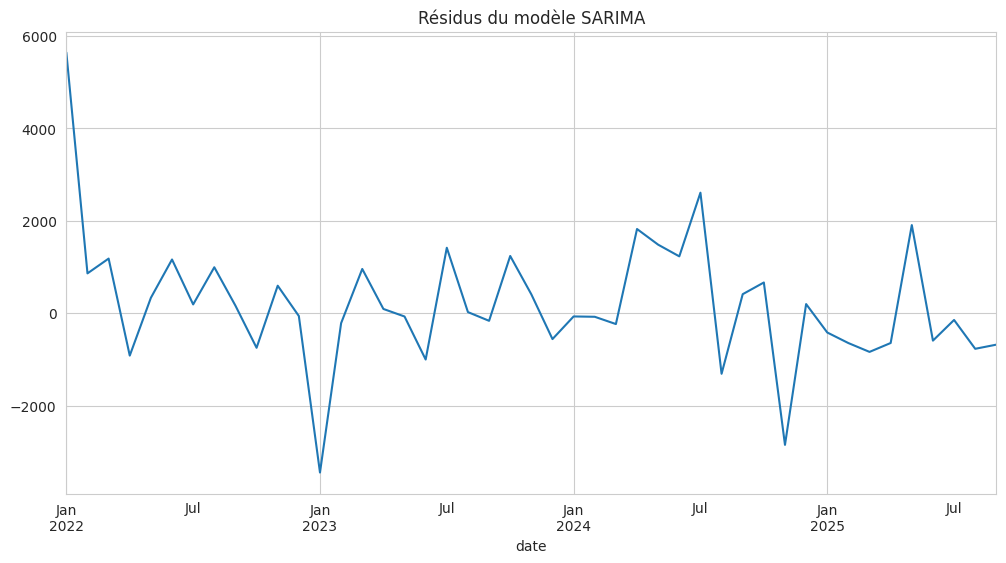

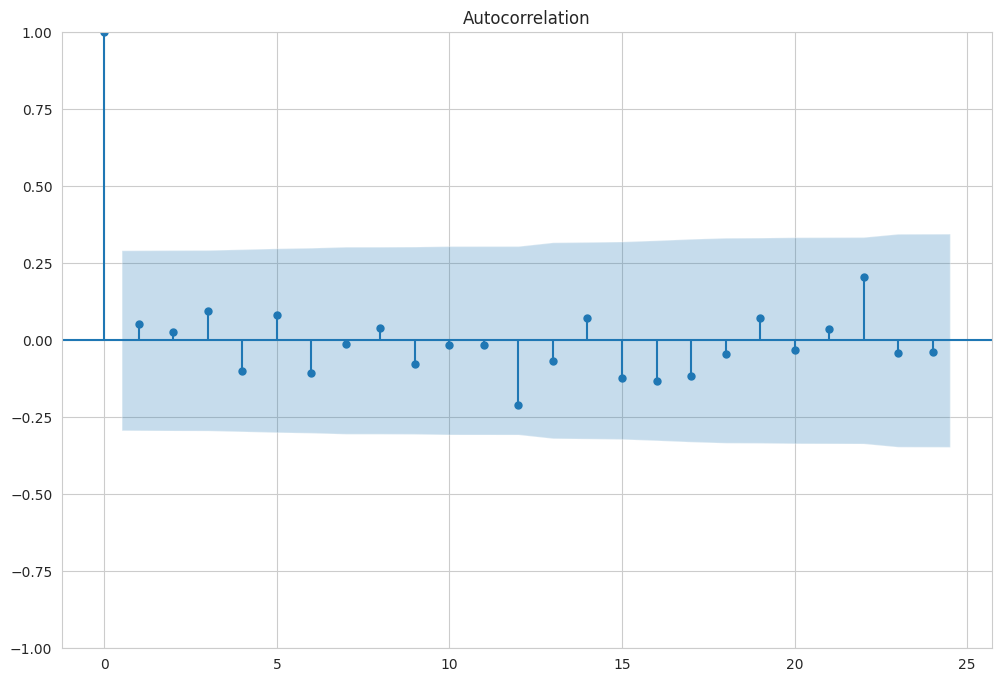

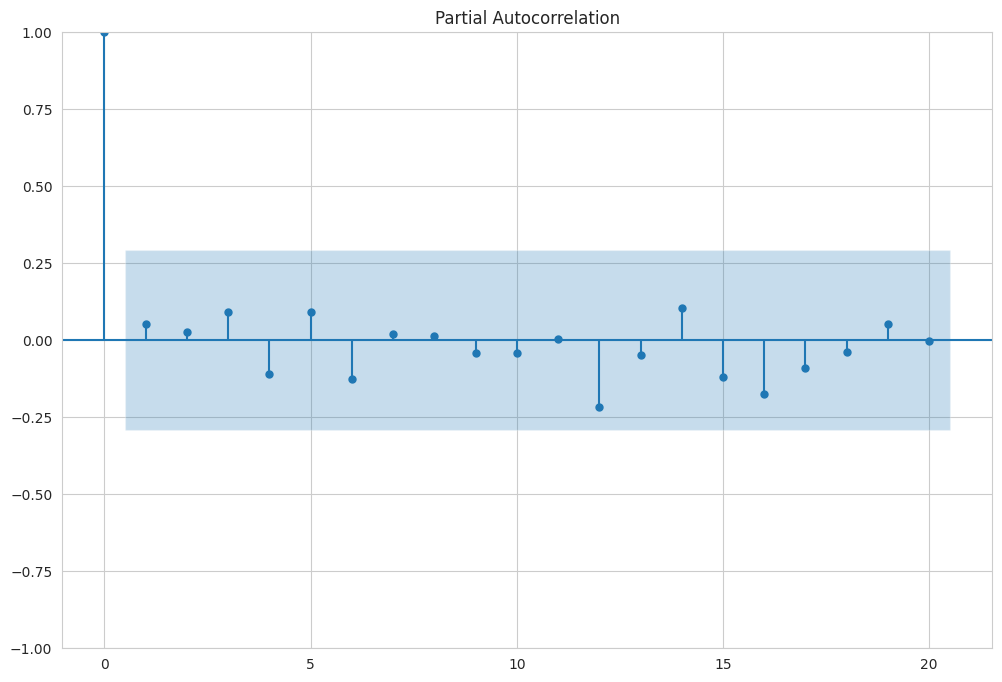

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Définir l'ordre non saisonnier (p, d, q) et l'ordre saisonnier (P, D, Q, S)
# Nous allons essayer un modèle SARIMA plus simple pour résoudre les problèmes de convergence
order = (1, 1, 0)      # Ordre non saisonnier simplifié (p, d, q)
seasonal_order = (1, 0, 0, 12) # Ordre saisonnier simplifié (P, D, Q, S)
# P=1, D=0, Q=0, S=12

# Adapter le modèle SARIMA avec les nouveaux ordres
model_sarima = SARIMAX(ts, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit_sarima = model_sarima.fit(disp=False) # disp=False pour éviter l'affichage des détails d'optimisation

# Afficher le résumé du modèle
print("Résumé du modèle SARIMA :")
print(model_fit_sarima.summary())

#Visualiser les résidus (facultatif)
residuals_sarima = model_fit_sarima.resid
residuals_sarima.plot(figsize=(12, 6))
plt.title("Résidus du modèle SARIMA")
plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals_sarima, lags=24)
plot_pacf(residuals_sarima, lags=min(20, len(residuals_sarima)//2 -1)) # Réduire le nombre de lags pour le PACF
plt.show()

Résumé du modèle Holt-Winters (Multiplicatif) :
                       ExponentialSmoothing Model Results                       
Dep. Variable:        Nbre recrutements   No. Observations:                   45
Model:             ExponentialSmoothing   SSE                       25475332.820
Optimized:                         True   AIC                            628.095
Trend:                         Additive   BIC                            657.002
Seasonal:                Multiplicative   AICC                           654.403
Seasonal Periods:                    12   Date:                 Mon, 17 Nov 2025
Box-Cox:                          False   Time:                         12:35:47
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alph

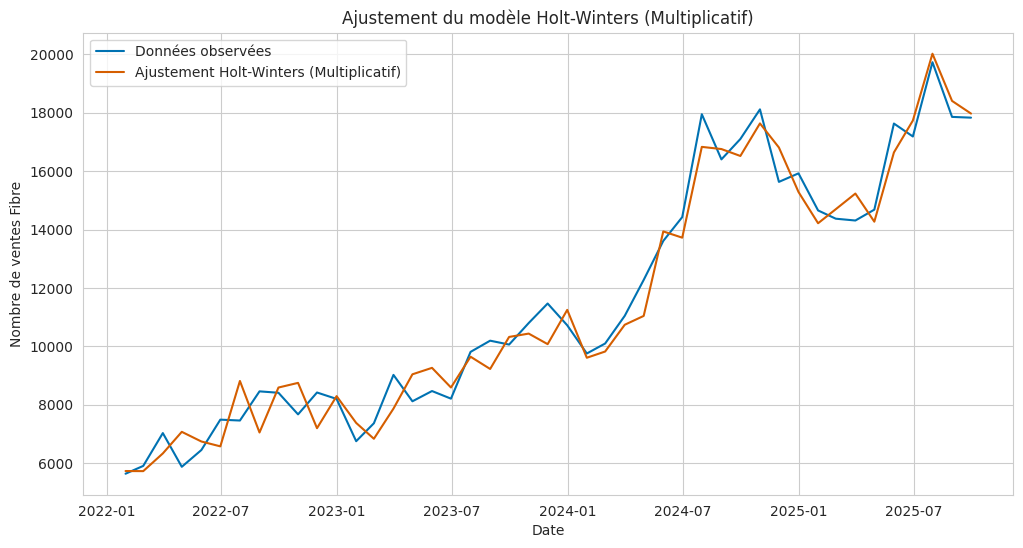

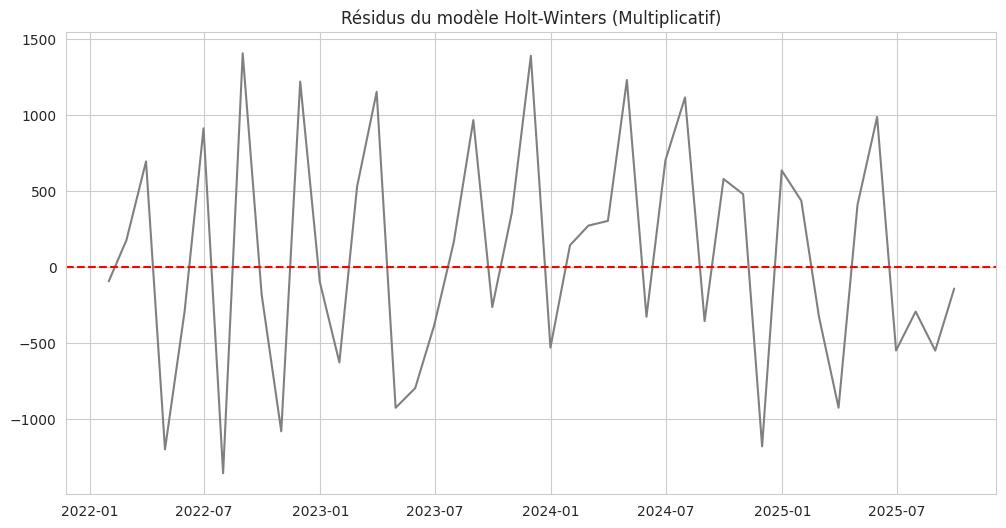

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Construction du modèle Holt-Winters multiplicatif
model_holt_mul = ExponentialSmoothing(ts, trend='add', seasonal='mul', seasonal_periods=12)
model_fit_holt_mul = model_holt_mul.fit()

# Résumé du modèle
print("Résumé du modèle Holt-Winters (Multiplicatif) :")
print(model_fit_holt_mul.summary())

# Visualisation de l'ajustement
plt.figure(figsize=(12,6))
plt.plot(ts.index, ts, label='Données observées', color='#0072B2')
plt.plot(model_fit_holt_mul.fittedvalues.index, model_fit_holt_mul.fittedvalues, label='Ajustement Holt-Winters (Multiplicatif)', color='#D55E00')
plt.title("Ajustement du modèle Holt-Winters (Multiplicatif)")
plt.xlabel("Date")
plt.ylabel("Nombre de ventes Fibre")
plt.legend()
plt.show()

# Visualisation des résidus
residuals_holt_mul = ts - model_fit_holt_mul.fittedvalues
plt.figure(figsize=(12,6))
plt.plot(residuals_holt_mul, color='gray')
plt.title("Résidus du modèle Holt-Winters (Multiplicatif)")
plt.axhline(0, color='red', linestyle='--')
plt.show()


                   Nbre recrutements  Recurrent
Nbre recrutements           1.000000  -0.046004
Recurrent                  -0.046004   1.000000


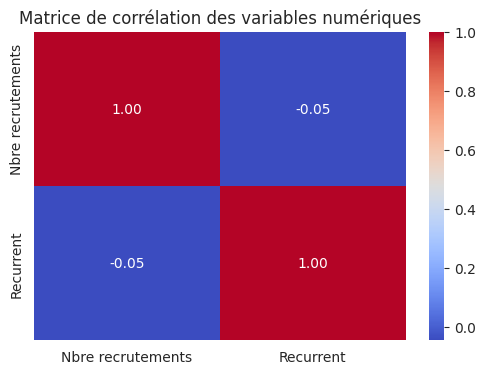

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des variables numériques
num_vars = ['Nbre recrutements', 'Recurrent']

# Calcul de la matrice de corrélation
corr_matrix = df_clean[num_vars].corr()

# Affichage de la matrice
print(corr_matrix)

# Heatmap pour visualisation
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()


Dimensions X_train : (41283, 315)
Dimensions X_test  : (21859, 315)

=== Régression Linéaire ===
RMSE : 0.00
MAE  : 0.00
R²   : 1.000

=== Random Forest ===
RMSE : 2.84
MAE  : 0.52
R²   : 0.974

=== XGBoost ===
RMSE : 4.01
MAE  : 0.62
R²   : 0.949

🔸 Résultats des modèles :
                Modèle          RMSE           MAE        R²
0  Régression Linéaire  2.743997e-13  2.126736e-13  1.000000
1        Random Forest  2.836802e+00  5.246251e-01  0.974414
2              XGBoost  4.014476e+00  6.189046e-01  0.948761


/tmp/ipython-input-811010674.py:93: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_monthly_sum = test_df.groupby(pd.Grouper(key='date', freq='M'))['Nbre recrutements'].sum().reset_index()
/tmp/ipython-input-811010674.py:107: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  predictions_monthly_sum = predictions_df.groupby(pd.Grouper(key='date', freq='M'))['Prévisions'].sum().reset_index()


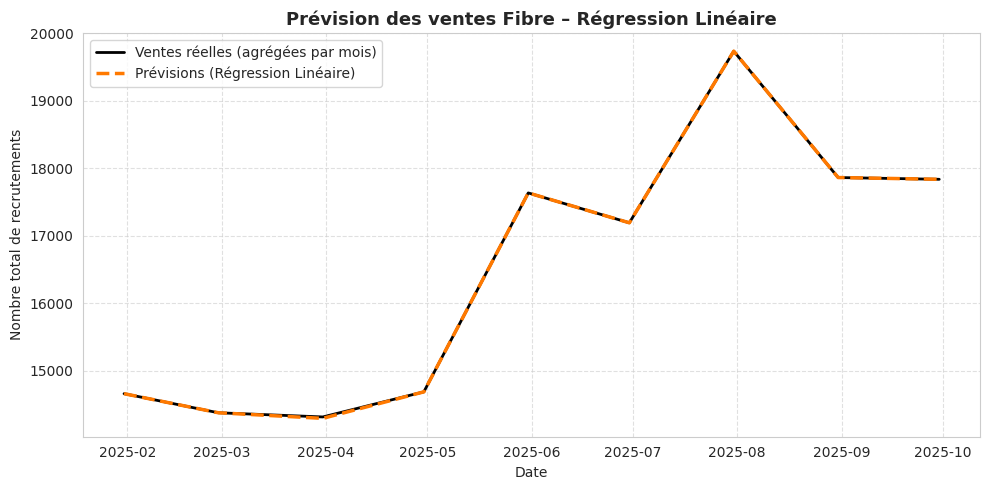

/tmp/ipython-input-811010674.py:107: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  predictions_monthly_sum = predictions_df.groupby(pd.Grouper(key='date', freq='M'))['Prévisions'].sum().reset_index()


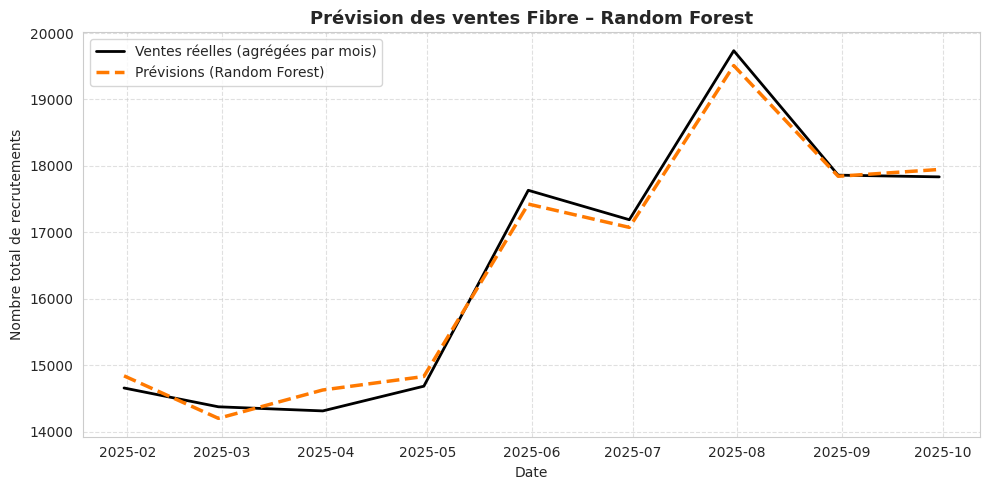

/tmp/ipython-input-811010674.py:107: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  predictions_monthly_sum = predictions_df.groupby(pd.Grouper(key='date', freq='M'))['Prévisions'].sum().reset_index()


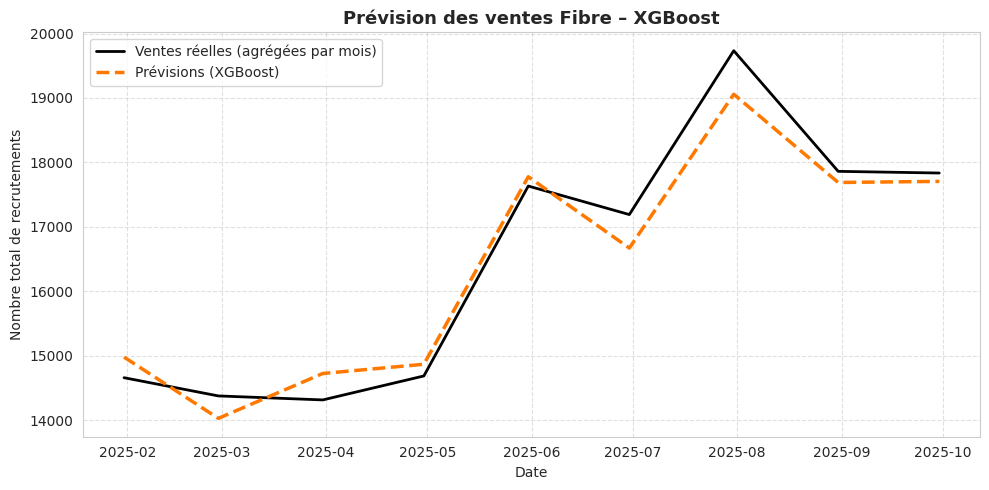

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Copie des jeux de données
# train_df_ml = train_df.copy() # Ces copies ne sont pas utilisées directement pour le split final
# test_df_ml = test_df.copy()   # Le split final utilise df_ml_encoded

# Ajout d'une variable temporelle (tendance)
df_clean['tendance'] = np.arange(len(df_clean))

# Création des lags et moyennes mobiles
for lag in [1, 2, 3]:
    df_clean[f'lag_{lag}'] = df_clean['Nbre recrutements'].shift(lag)
df_clean['rolling_3'] = df_clean['Nbre recrutements'].rolling(3).mean()
df_clean['rolling_6'] = df_clean['Nbre recrutements'].rolling(6).mean()

# Supprimer les premières lignes avec valeurs manquantes dues aux lags
df_clean = df_clean.dropna()

# Colonnes catégorielles
categorical_vars = ['geolocalisaton', 'Localisation', 'canal', 'partenaire',
                    'franchise', 'categorie', 'profil', 'debit', 'plan tarifaire'
                    ]


# Supprimer les colonnes non nécessaires (elles ont déjà servi à créer 'date')
# df_ml = df_ml.drop(columns=['Année', 'mois'], errors='ignore') # Ceci devrait être fait sur df_clean_encoded avant le split


# Encodage One-hot
df_clean_encoded = pd.get_dummies(df_clean, columns=categorical_vars, drop_first=True)

# Refaire la séparation train/test selon ta logique initiale
# Utiliser le df_clean_encoded qui contient déjà les lags, rolling, tendance et encodage
train_encoded = df_clean_encoded[df_clean_encoded['date'] < '2025-01-01']
test_encoded = df_clean_encoded[df_clean_encoded['date'] >= '2025-01-01']


# Définir features et cible
X_train = train_encoded.drop(columns=['date', 'Nbre recrutements', 'Année', 'mois'], errors='ignore') # Supprimer Année et mois ici si elles sont encore présentes
y_train = train_encoded['Nbre recrutements']
X_test = test_encoded.drop(columns=['date', 'Nbre recrutements', 'Année', 'mois'], errors='ignore') # Supprimer Année et mois ici si elles sont encore présentes
y_test = test_encoded['Nbre recrutements'] # y_test contient toujours les valeurs individuelles ici, ce n'est pas un problème pour l'évaluation mais pour la visualisation


print("Dimensions X_train :", X_train.shape)
print("Dimensions X_test  :", X_test.shape)

# ======================================
# 🔹 Entraînement et évaluation des modèles
# ======================================

models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Les métriques d'évaluation (RMSE, MAE, R²) sont calculées sur les valeurs individuelles
    # car les modèles ML prédisent au niveau de chaque ligne.
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({"Modèle": name, "RMSE": rmse, "MAE": mae, "R²": r2})
    print(f"\n=== {name} ===")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE  : {mae:.2f}")
    print(f"R²   : {r2:.3f}")

# Tableau comparatif
results_df = pd.DataFrame(results)
print("\n🔸 Résultats des modèles :")
print(results_df)

# ======================================
# 🔹 Visualisation des prévisions de chaque modèle séparément (charte Orange)
# ======================================

# Agrégation des données réelles de test par mois pour la visualisation
# Utiliser test_df pour l'agrégation car il contient les dates et les Nbre recrutements individuels
test_monthly_sum = test_df.groupby(pd.Grouper(key='date', freq='M'))['Nbre recrutements'].sum().reset_index()
test_monthly_sum.columns = ['date', 'Ventes réelles agrégées']


for name, model in models.items():
    # Prédictions du modèle
    y_pred = model.predict(X_test)

    # Créer un dataframe pour les prédictions avec les dates correspondantes
    # Assurez-vous que les prédictions sont associées aux bonnes dates du test_encoded
    predictions_df = test_encoded[['date']].copy()
    predictions_df['Prévisions'] = y_pred

    # Agrégation des prédictions par mois pour la visualisation
    predictions_monthly_sum = predictions_df.groupby(pd.Grouper(key='date', freq='M'))['Prévisions'].sum().reset_index()


    # Création du graphique
    plt.figure(figsize=(10,5))

    # Tracer les ventes réelles agrégées
    plt.plot(test_monthly_sum['date'], test_monthly_sum['Ventes réelles agrégées'],
             label='Ventes réelles (agrégées par mois)', color='black', linewidth=2)

    # Tracer les prévisions agrégées
    plt.plot(predictions_monthly_sum['date'], predictions_monthly_sum['Prévisions'],
             label=f'Prévisions ({name})', color='#FF7900', linestyle='--', linewidth=2.5)

    # Mise en forme
    plt.title(f"Prévision des ventes Fibre – {name}", fontsize=13, fontweight='bold')
    plt.xlabel("Date")
    plt.ylabel("Nombre total de recrutements")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

In [29]:
# Entraîner le modèle sur toutes les variables
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Obtenir les coefficients
coefficients = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': lr_model.coef_
})

# Trier par impact absolu
coefficients['Impact'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Impact', ascending=False)
print(coefficients.head(10))  # Affiche les 10 variables les plus importantes


                                     Variable   Coefficient        Impact
5                                   rolling_3  3.000000e+00  3.000000e+00
3                                       lag_2 -1.000000e+00  1.000000e+00
2                                       lag_1 -1.000000e+00  1.000000e+00
248  plan tarifaire_Fibre UP Pro Confort 300M  4.381936e-12  4.381936e-12
203                                debit_300M -4.087999e-12  4.087999e-12
276               plan tarifaire_OBox Premium -3.980990e-12  3.980990e-12
243      plan tarifaire_Fibre UP Confort 300M  3.865519e-12  3.865519e-12
198                                 debit_1GB -2.916409e-12  2.916409e-12
294             plan tarifaire_Ofibre Premium -2.835690e-12  2.835690e-12
247      plan tarifaire_Fibre UP Premium 500M -2.658015e-12  2.658015e-12


PREVISION OCTOBRE

In [30]:
import pandas as pd
import numpy as np

# 🔹 Copier le dataset complet
df_future = df_clean.copy()

# 🔹 Créer la colonne date
df_future['mois'] = df_future['mois'].astype(str).str.zfill(2)
df_future['date'] = pd.to_datetime(df_future['Année'].astype(str) + df_future['mois'], format='%Y%m')

# 🔹 Ajouter variable tendance
# Assurez-vous que la tendance est calculée sur TOUT le dataframe avant de faire les lags
df_future['tendance'] = np.arange(len(df_future))


# Fusion des deux jeux pour générer les lags et moyennes mobiles
# Il est plus simple de calculer les lags et rolling sur le dataframe complet df_clean avant le split
df_clean['tendance'] = np.arange(len(df_clean)) # Ajouter la tendance ici

for lag in [1, 2, 3]:
    df_clean[f'lag_{lag}'] = df_clean['Nbre recrutements'].shift(lag)
df_clean['rolling_3'] = df_clean['Nbre recrutements'].rolling(3).mean()
df_clean['rolling_6'] = df_clean['Nbre recrutements'].rolling(6).mean()

# Gérer les NaN introduits par les lags/rolling en les remplaçant
df_clean = df_clean.fillna(0) # Ou une autre stratégie d'imputation si pertinente


# Colonnes catégorielles
categorical_vars = ['geolocalisaton', 'Localisation', 'canal', 'partenaire',
                    'franchise', 'categorie', 'profil', 'debit', 'plan tarifaire'
                    ]

# Encodage One-hot
df_clean_encoded = pd.get_dummies(df_clean, columns=categorical_vars, drop_first=True)


# Maintenant, créons la ligne pour octobre 2025 manuellement
# Nous aurons besoin des 3 dernières observations réelles pour les lags et rolling
last_date = ts.index[-1] # Dernière date dans la série temporelle agrégée (Septembre 2025)

# Créer la date d'octobre 2025
october_date = last_date + pd.DateOffset(months=1)

# Créer une nouvelle ligne pour octobre 2025
# Il faut remplir cette ligne avec les valeurs correspondantes (tendance, lags, rolling, variables encodées)
# Pour les lags et rolling, on prend les dernières valeurs disponibles dans df_clean
# Pour les variables catégorielles encodées, on peut créer une ligne de zéros et mettre à 1 les colonnes pertinentes si on prédit pour une catégorie spécifique,
# ou bien, pour une prédiction globale, on peut ignorer ces variables ou prendre leur moyenne/mode si le modèle linéaire les utilise.
# Étant donné que le modèle linéaire est très sensible aux lags/rolling (coefficients à 3 et -1),
# et que les variables encodées ont des coefficients très proches de zéro, nous pouvons
# créer une ligne type basée sur la dernière ligne de df_clean_encoded et ajuster la tendance, les lags et rolling.

# Trouver la dernière ligne dans le dataframe encodé qui n'est pas NaN (après lags/rolling)
last_row_encoded = df_clean_encoded.iloc[-1].copy()

# Créer la nouvelle ligne pour octobre 2025
new_row_data = last_row_encoded.copy()

# Mettre à jour la date et la tendance
new_row_data['date'] = october_date
new_row_data['tendance'] = df_clean['tendance'].max() + 1 # Tendance séquentielle

# Mettre à jour les lags et rolling values basés sur les dernières valeurs réelles
# Les lags de la nouvelle ligne seront les valeurs réelles des mois précédents
# Lag_1 pour Oct 2025 = Nbre recrutements de Sep 2025 (last_date)
# Lag_2 pour Oct 2025 = Nbre recrutements de Aug 2025 (last_date - 1 month)
# Lag_3 pour Oct 2025 = Nbre recrutements de Jul 2025 (last_date - 2 months)

# Récupérer les dernières valeurs réelles de Nbre recrutements
last_recrutements = ts.iloc[-1] # Sep 2025
lag1_value = last_recrutements
lag2_value = ts.iloc[-2] if len(ts) >= 2 else 0 # Aug 2025
lag3_value = ts.iloc[-3] if len(ts) >= 3 else 0 # Jul 2025

new_row_data['lag_1'] = lag1_value
new_row_data['lag_2'] = lag2_value
new_row_data['lag_3'] = lag3_value

# Recalculer rolling_3 et rolling_6 pour la nouvelle date
# Rolling_3 pour Oct 2025 sera la moyenne de Sep, Aug, Jul 2025 (les derniers 3 mois connus)
# Rolling_6 pour Oct 2025 sera la moyenne de Sep, Aug, Jul, Jun, May, Apr 2025 (les derniers 6 mois connus)

last_3_months_data = ts.iloc[-3:].mean() if len(ts) >= 3 else 0
last_6_months_data = ts.iloc[-6:].mean() if len(ts) >= 6 else 0

new_row_data['rolling_3'] = last_3_months_data
new_row_data['rolling_6'] = last_6_months_data

# S'assurer que les colonnes correspondent exactement à X_train
# La ligne new_row_data est une Series. Convertir en DataFrame pour la prédiction
X_october = pd.DataFrame([new_row_data.drop(['date', 'Nbre recrutements'])])


# S'assurer que l'ordre des colonnes est le même que X_train
X_october = X_october[X_train.columns]


# 🔹 Prédiction avec le modèle Régression Linéaire (qui a R²=1.000 sur le test set)
# best_model = models['Régression Linéaire'] # Utilisez le modèle déjà défini dans les variables
y_october_pred_linear = models['Régression Linéaire'].predict(X_october)

# 🔹 Créer un dataframe avec la date et les prédictions
df_october_pred_linear = pd.DataFrame({'date': [october_date], 'Prévision_Nbre_recrutements_Linear': y_october_pred_linear})


print("Prévision des ventes pour octobre 2025 (Régression Linéaire) :", int(y_october_pred_linear[0]))

# Si vous voulez aussi prédire avec d'autres modèles
# y_october_pred_rf = models['Random Forest'].predict(X_october)
# df_october_pred_rf = pd.DataFrame({'date': [october_date], 'Prévision_Nbre_recrutements_RF': y_october_pred_rf})
# print("Prévision des ventes pour octobre 2025 (Random Forest) :", int(y_october_pred_rf[0]))

# y_october_pred_xgb = models['XGBoost'].predict(X_october)
# df_october_pred_xgb = pd.DataFrame({'date': [october_date], 'Prévision_Nbre_recrutements_XGB': y_october_pred_xgb})
# print("Prévision des ventes pour octobre 2025 (XGBoost) :", int(y_october_pred_xgb[0]))

Prévision des ventes pour octobre 2025 (Régression Linéaire) : 19733


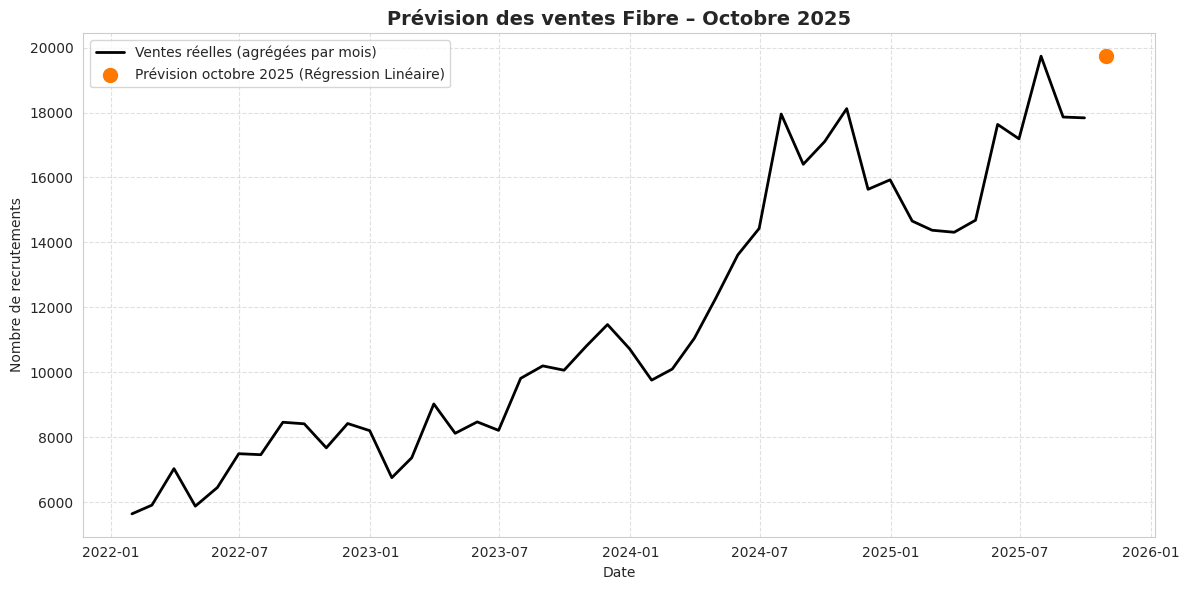

In [31]:
import matplotlib.pyplot as plt

# Historique des ventes avant octobre 2025 (utilisons la série agrégée 'ts')
# Filtrer ts pour les dates avant octobre 2025
historical_ts = ts[ts.index < '2025-10-01']

# Le dataframe de prévision pour octobre 2025 est df_october_pred_linear créé dans la cellule précédente
prediction_date = df_october_pred_linear['date'].iloc[0]
prediction_value = df_october_pred_linear['Prévision_Nbre_recrutements_Linear'].iloc[0]


plt.figure(figsize=(12,6))
plt.plot(historical_ts.index, historical_ts.values, # Utiliser l'index et les valeurs de la série ts
         label='Ventes réelles (agrégées par mois)', color='black', linewidth=2)
plt.scatter(prediction_date, prediction_value,
            color='#FF7900', label='Prévision octobre 2025 (Régression Linéaire)', s=100, zorder=5) # zorder pour s'assurer qu'il est visible

plt.title("Prévision des ventes Fibre – Octobre 2025", fontsize=14, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Nombre de recrutements")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()